# A closer look at ecosystem services

One feature, that is astonishing so far, is the fact that even when the entire environment goes to shit, income from ecosystem services seems to stay high as long as settlements dont die.
For reference, look at the standard setup of the model.

First, load packages and data to work with

In [143]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

Populating the interactive namespace from numpy and matplotlib


In [144]:
loc1 = '/home/jakob/Project_MayaSim/Python/output_data/X4_es_income/results/trajectory'
loc2 = '/home/jakob/Project_MayaSim/Python/output_data/X4_es_income/results/traders_trajectory'
all_cities = pd.read_pickle(loc1)
trade_cities = pd.read_pickle(loc2)

In [145]:
def areaplot(columns, devider, y_label, better_ess):
    fig1 = plt.figure()
    for i, t in enumerate([True, False]):
        ax = fig1.add_subplot(1,2,i+1)

        tmp = all_cities['mean_trajectories'].xs(level=('kill_cropless', 'better_ess'), 
                                                 key=(t, better_ess)).unstack('observables')
        if devider is not None:
            data = tmp.div(tmp[devider], axis=0)
        else:
            data = tmp
        ln = data[columns].plot.area(ax=ax, legend = not t)
        ax.set_ylabel(y_label)
        if t:
            ax.set_title('killing settlements without crops is {}'.format('true' if t else 'false'))
            pass
        else:
            ax.set_title('killing settlements without crops is {}'.format('true' if t else 'false'))
        if not t:
            lg = ln.get_legend()
            bb = lg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)
            xOffset = .7
            bb.x0 += xOffset
            bb.x1 += xOffset
            lg.set_bbox_to_anchor(bb, transform = ax.transAxes)
            pass
    fig1.tight_layout()

Look at the state of the ecosystem: forest, soil and waterflow. 

Notably, the ecosystem declines in both conditions. The forest declines even further, if settlements without agriculture are not removed. Soil degradation however, is more pronounced, if settlements without agriculture are removed.

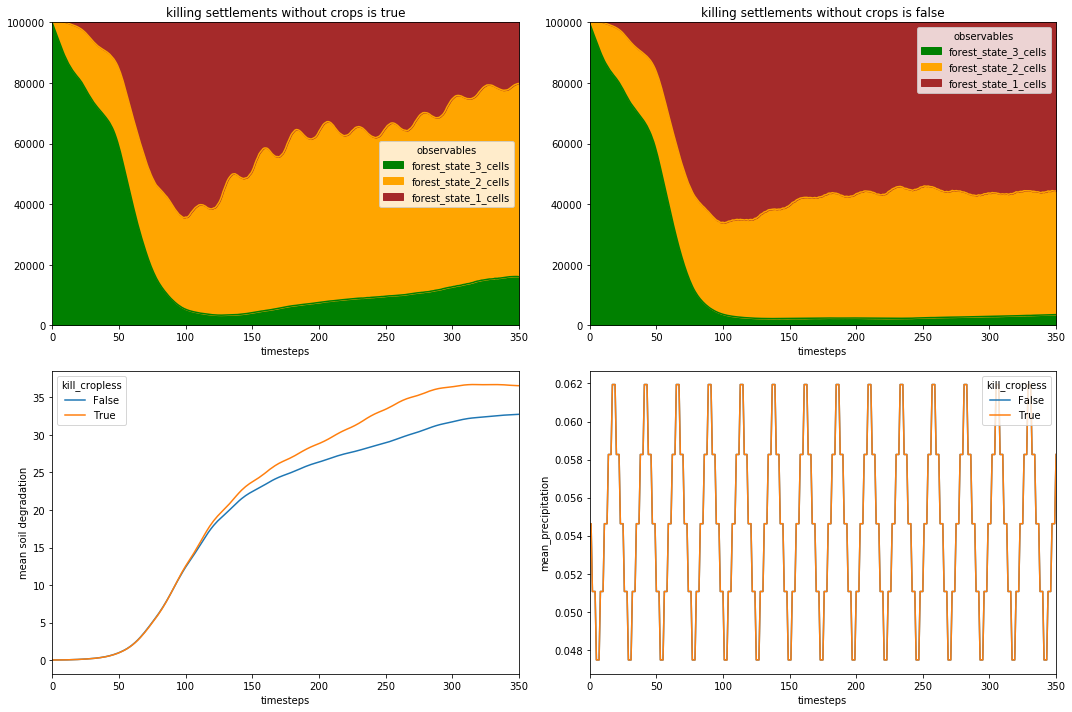

In [146]:
pylab.rcParams['figure.figsize'] = (15, 10)
fig = plt.figure()
k = False
for i, t in enumerate([True, False]):
    ax = fig.add_subplot(2,2,i+1)

    all_cities['mean_trajectories']\
        .xs(level=('kill_cropless', 'better_ess'), key=(t, k))\
        .unstack('observables')[['forest_state_3_cells', 'forest_state_2_cells',
       'forest_state_1_cells']].plot.area(ax=ax, color=['g', 'Orange', 'Brown'])
    ax.set_ylim([0, 100000])
    if t:
        ax.set_title('killing settlements without crops is {}'.format('true' if t else 'false'))
        pass
    else:
        ax.set_title('killing settlements without crops is {}'.format('true' if t else 'false'))
ax = fig.add_subplot(2, 2, 3)
all_cities['mean_trajectories']\
    .xs(level=('observables', 'better_ess'), key=('mean_soil_degradation', k))\
    .unstack('kill_cropless').plot(ax=ax)
ax.set_ylabel('mean soil degradation')
ax = fig.add_subplot(2, 2, 4)
all_cities['mean_trajectories']\
    .xs(level=('observables', 'better_ess'), key=('mean_waterflow', k))\
    .unstack('kill_cropless').plot(ax=ax)
ax.set_ylabel('mean_precipitation')
fig.tight_layout()

Then look at the income from different parts of the ecosystem.

First per cell, then per settlement.

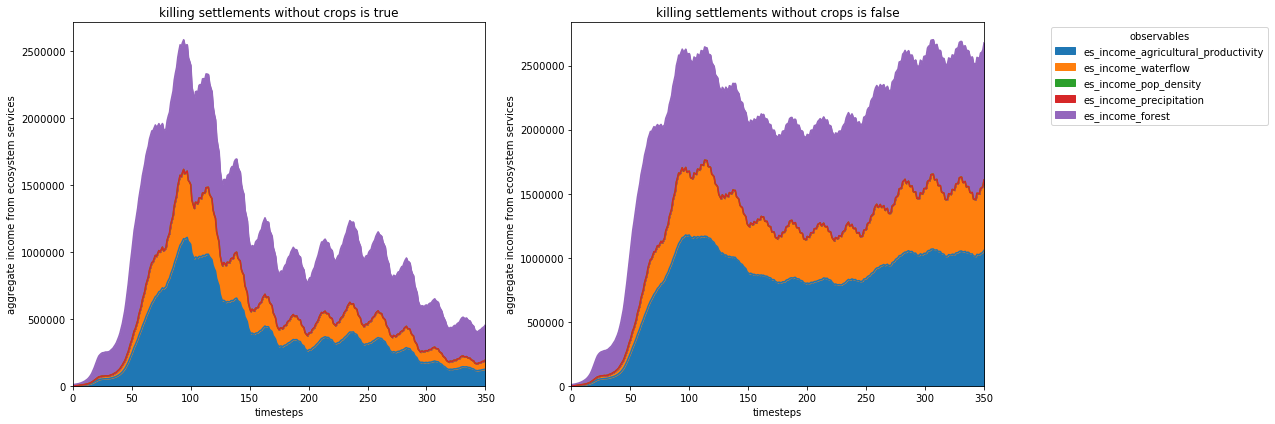

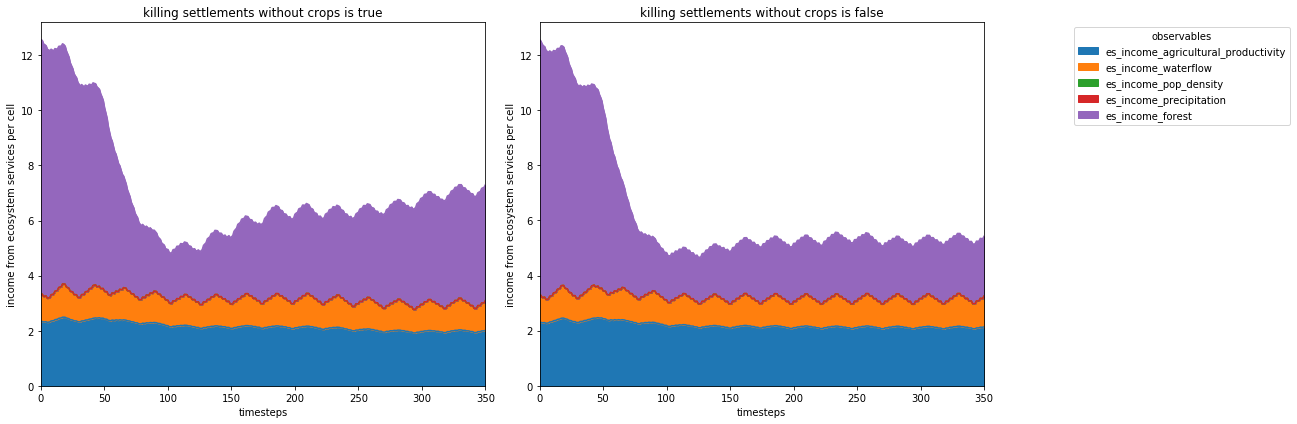

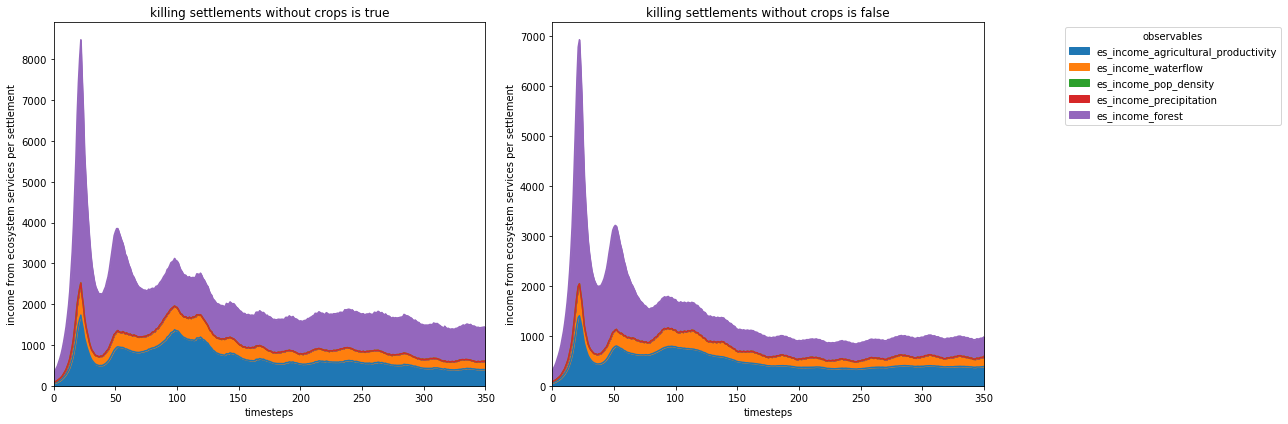

In [147]:
pylab.rcParams['figure.figsize'] = (14, 6)
areaplot(devider=None, 
         columns=['es_income_agricultural_productivity', 'es_income_waterflow',
          'es_income_pop_density', 'es_income_precipitation', 'es_income_forest'
          ], 
         y_label='aggregate income from ecosystem services', 
         better_ess=False)
areaplot(devider='total_cells_in_influence',
         columns=['es_income_agricultural_productivity', 'es_income_waterflow',
          'es_income_pop_density', 'es_income_precipitation', 'es_income_forest'],
         y_label='income from ecosystem services per cell',
         better_ess=False)
areaplot(devider='total_settlements',
         columns=['es_income_agricultural_productivity', 'es_income_waterflow',
          'es_income_pop_density', 'es_income_precipitation', 'es_income_forest'],
         y_label='income from ecosystem services per settlement',
         better_ess=False)

There are a number of things, that are visible from these results.
* From the second line of plots: The income from forest per cell does shadow the development of the forest ecosystem,
  The income from agricultural productivity does not show the decline in soil nor the decline in forest.
* The fluctuations in precipitation have little influence on ecosystem services. Could be, that the fluctuations are not pronounced enough.
* From the third line of plots: income per settlement spikes in the beginning, where the ecosystem is still intact and settlement only just start using it and saturates at a low level later.
* From the first line of plots: Aggregate income differs strongly between the two conditions. It declines, if settlements are removed whereas it saturates, if settlements can persist even without agriculture. This means, that there emerge a big number of settlements, that live only on ecosystem services and maybe trade. Lets have a look at the different sources of income next.

** Note: I should drive the fluctuations in the ecosystem to the extremes, or implement some serious drought events, where rain ceases almost completely. **

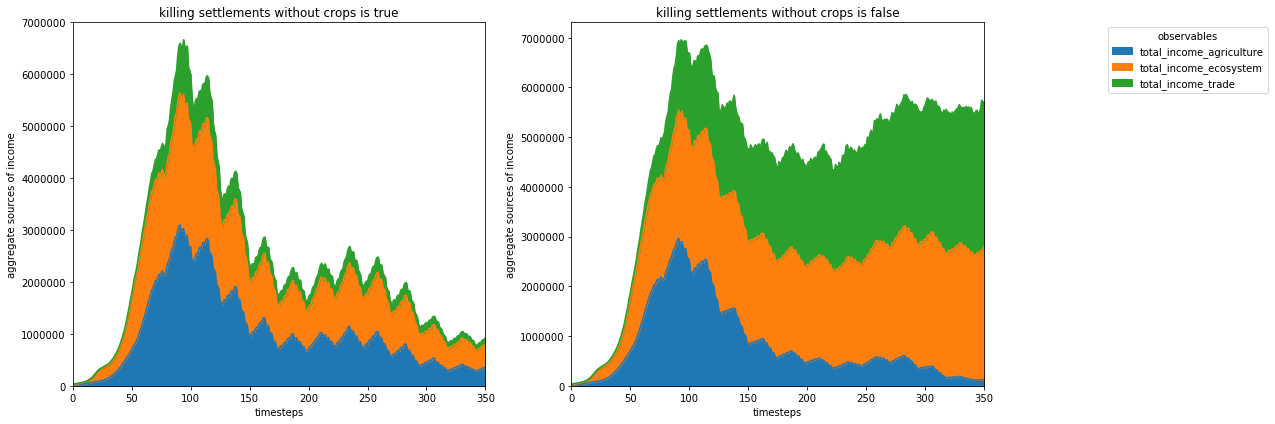

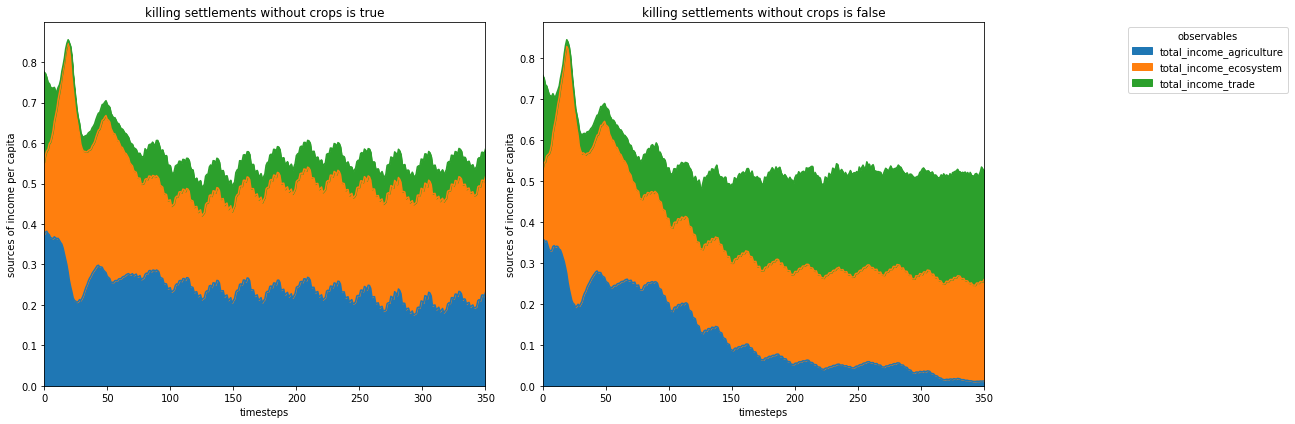

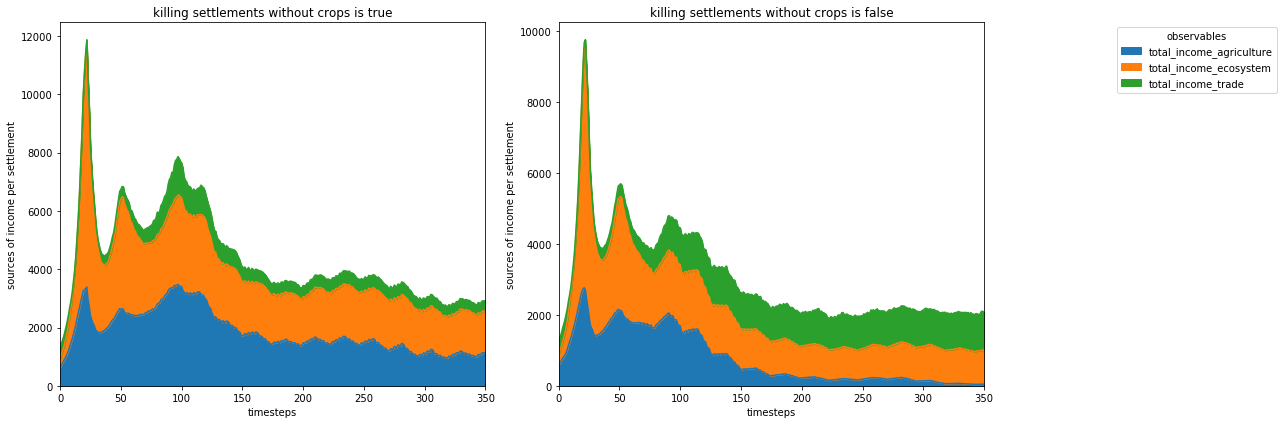

In [148]:
areaplot(devider=None,
         columns=['total_income_agriculture', 'total_income_ecosystem',
           'total_income_trade'],
         y_label='aggregate sources of income',
         better_ess=False)
areaplot(devider='total_population',
         columns=['total_income_agriculture', 'total_income_ecosystem',
           'total_income_trade'],
         y_label='sources of income per capita',
         better_ess=False)
areaplot(devider='total_settlements',
         columns=['total_income_agriculture', 'total_income_ecosystem',
           'total_income_trade'],
         y_label='sources of income per settlement',
         better_ess=False)


After a phase of rapid transition in the beginning, the income per capita stays roughtly constant - presumably around the subsistance level.
This means, that the population and settlement density will reach the carying capacity of the ecosystem and stay there. It also means, that the 'complex society state' crucially depends on income from ecosystem services (sice it generates half of its income from that source)

Therefore, If the income from ecosystem serviced depended on precipitation, stopping precipitation would naturally destroy the complex society state.
Also, generating income from agricultural productivity directly does not make sense since the forest ecosystem is the proxy for all biomass production that could be used. 

Therefore, I try to chagen the calculation of income from ecosystem services from forest and agricultural productivity from a sum of the factors to a product of them. The following ist the result derived with these modifications.

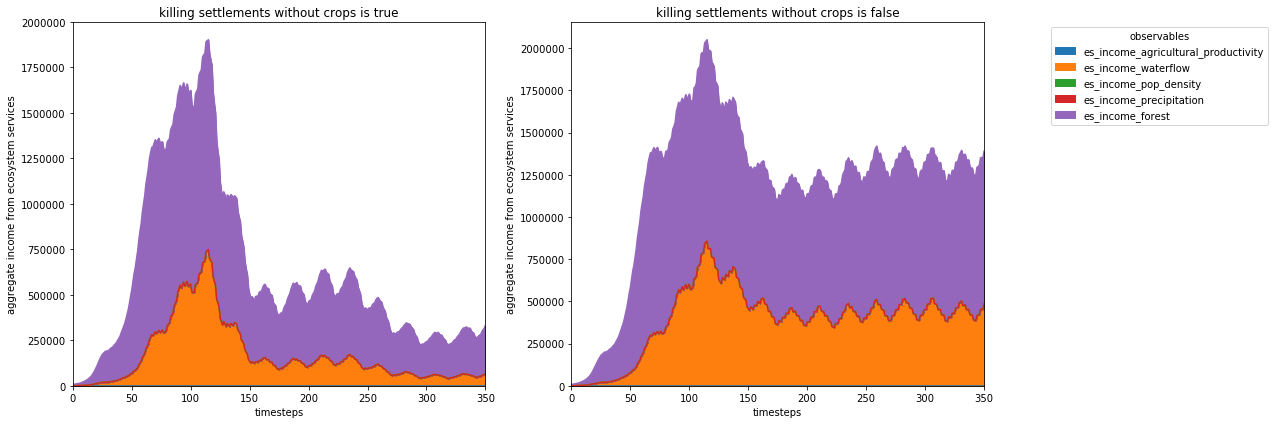

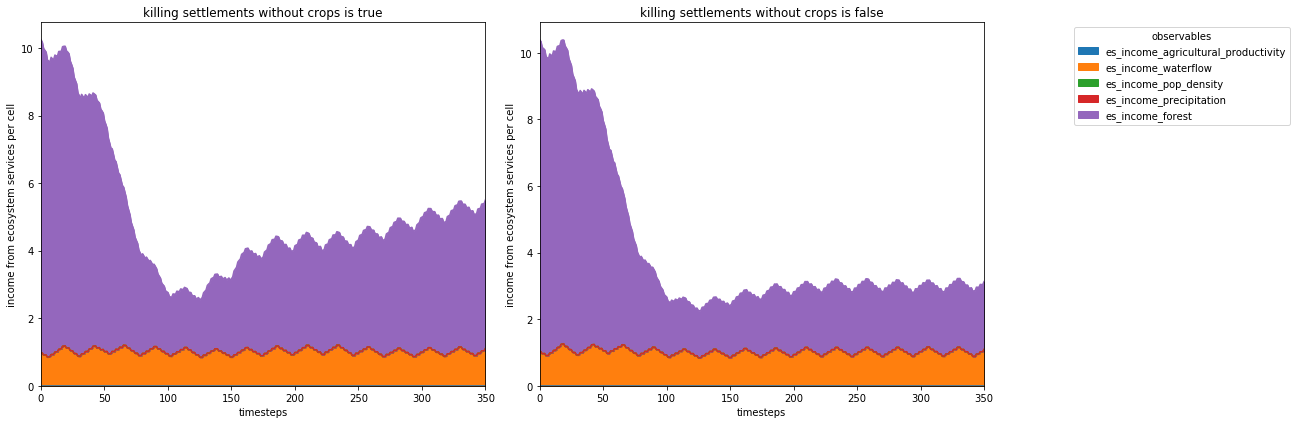

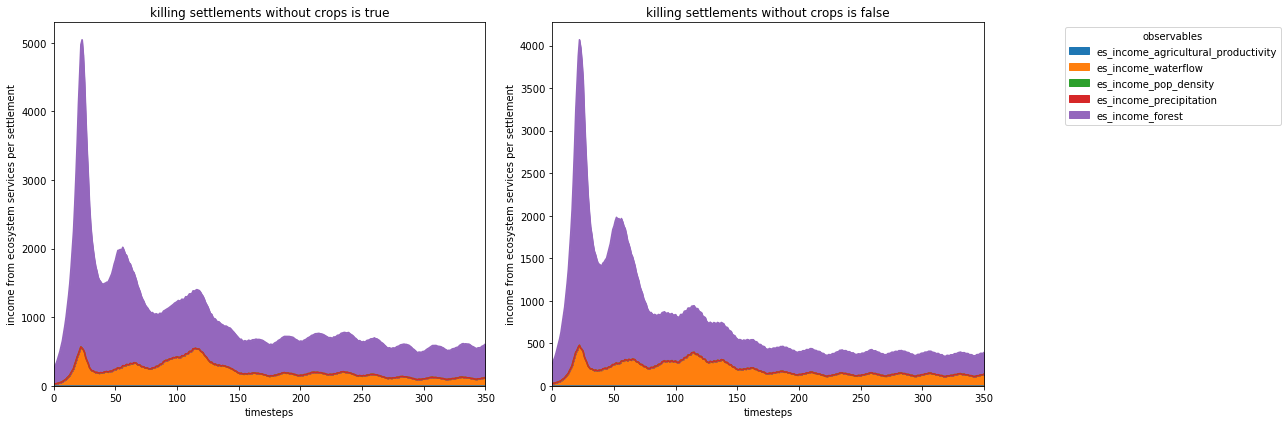

In [149]:
pylab.rcParams['figure.figsize'] = (14, 6)
areaplot(devider=None, 
         columns=['es_income_agricultural_productivity', 'es_income_waterflow',
          'es_income_pop_density', 'es_income_precipitation', 'es_income_forest'
          ], 
         y_label='aggregate income from ecosystem services', 
         better_ess=True)
areaplot(devider='total_cells_in_influence',
         columns=['es_income_agricultural_productivity', 'es_income_waterflow',
          'es_income_pop_density', 'es_income_precipitation', 'es_income_forest'],
         y_label='income from ecosystem services per cell',
         better_ess=True)
areaplot(devider='total_settlements',
         columns=['es_income_agricultural_productivity', 'es_income_waterflow',
          'es_income_pop_density', 'es_income_precipitation', 'es_income_forest'],
         y_label='income from ecosystem services per settlement',
         better_ess=True)

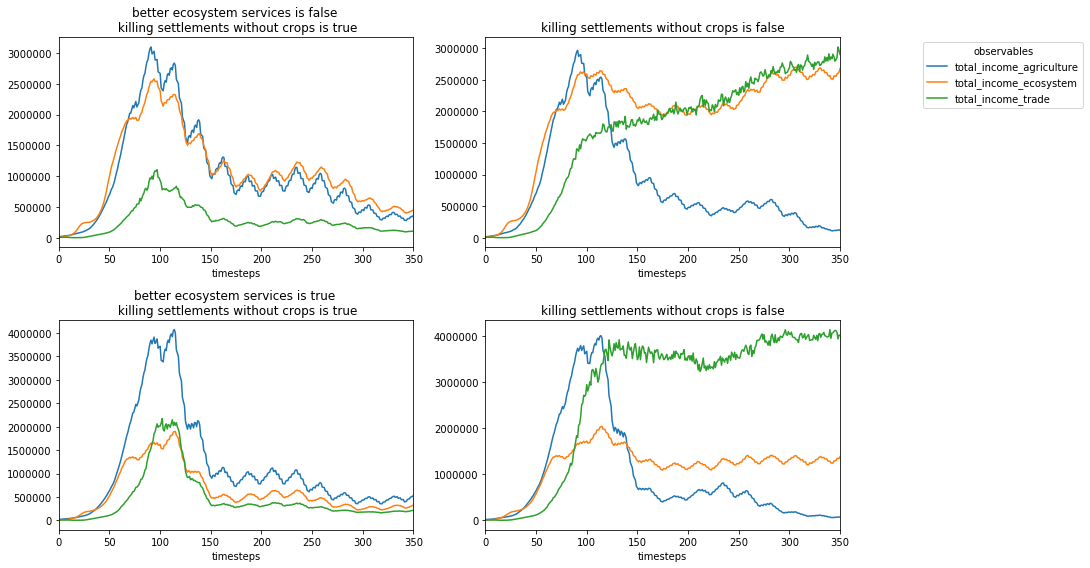

In [150]:
pylab.rcParams['figure.figsize'] = (12, 8)
fig = plt.figure()
for j, k in enumerate([False, True]):
    for i, t in enumerate([True, False]):
        ax = fig.add_subplot(2,2,i+1+2*j)

        ln = all_cities['mean_trajectories']\
            .xs(level=('kill_cropless', 'better_ess'), key=(t, k))\
            .unstack('observables')[['total_income_agriculture', 'total_income_ecosystem',
           'total_income_trade']].plot(ax=ax, legend = not k and not t)
        if t:
            ax.set_title('better ecosystem services is {} \n \
                         killing settlements without crops is {}'\
                         .format('true' if k else 'false', 'true' if t else 'false'))
            pass
        else:
            ax.set_title('killing settlements without crops is {}'.format('true' if t else 'false'))
        if not k and not t: 
            lg = ln.get_legend()
            bb = lg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)
            xOffset = .7
            bb.x0 += xOffset
            bb.x1 += xOffset
            lg.set_bbox_to_anchor(bb, transform = ax.transAxes)
            pass
fig.tight_layout()